# Load injection - Homemade python script

This notebook studies the impact of different load injection on the response time of CoAP requests

In [1]:
import os
cur_dir=os.getcwd() # save current directory to save the generated CSV files

%cd ../../..
%pwd

/home/jovyan/work


'/home/jovyan/work'

## Introduction

This notebook uses the 03-g5k-iotlab.ipynb to evaluate the impact on the response time of different load injections. For that, we vary the **sleep_interval**, keeping the other parameters fixed.

It is divided in 3 main parts, which could be 3 different notebooks depending on the complexity of your study. For the hackathon, however, we opt for keeping them in the same notebook.

- **Description**: creates a data frame containing the description of the different parameters of your experiment. In our case the different **sleep_interval** used.
- **Running**: Reads the data frame with the description the experiment and runs each experiment. It uses papermill to call the 03-g5k-iotlab.ipynb notebook with the correct parameters. Also, creates a data frame with the results.
- **Analysis**: Finally, read the output from the running phase and performs the data analysis.

Note that you can run each part **independently**. It only depends on running the first cell of this notebook to set the cur_dir properly.

## Description

Describing the parameters used in the different experiment runs.

In [4]:
import pandas
import io
import uuid
import datetime

job_name="rsd-hackathon"

# Probably a programmatic way to describe the test is better...
experiments=io.StringIO("""
firmware,iotlab_nodes,g5k_nodes,duration,sleep_interval
contikimac,4,1,300,0.05
contikimac,4,1,300,0.1
contikimac,4,1,300,0.2
contikimac,4,1,300,1
""")
# number of runs
N=3

df = pandas.read_csv(experiments)
# repeat N times each test
df = pandas.concat([df.assign(run=i) for i in range(0,N)], ignore_index=True)

df['exp_id'] = [str(uuid.uuid4()) for _,_ in df.iterrows()]
df['date'] = str(datetime.date.today())
df['data_dir'] = ["data/raw/%s/%s" % (i['date'], i['exp_id']) for _,i in df.iterrows()]
df['notebook_dir'] = ["%s/%s" % (cur_dir, i['exp_id']) for _,i in df.iterrows()]
df['state'] = 'created'

# randomize test execution
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv("%s/experiment.csv" % cur_dir)
df

firmware  iotlab_nodes  g5k_nodes  duration  sleep_interval  run  \
0   contikimac             4          1       300            1.00    0   
1   contikimac             4          1       300            0.20    2   
2   contikimac             4          1       300            0.10    0   
3   contikimac             4          1       300            0.10    2   
4   contikimac             4          1       300            1.00    2   
5   contikimac             4          1       300            0.05    2   
6   contikimac             4          1       300            1.00    1   
7   contikimac             4          1       300            0.05    0   
8   contikimac             4          1       300            0.20    1   
9   contikimac             4          1       300            0.05    1   
10  contikimac             4          1       300            0.10    1   
11  contikimac             4          1       300            0.20    0   

                                  exp_id        date  \
0   0936eadb-23be-440b-a984-ab1f5981f64c  2021-09-08   
1   f01a85c7-0784-4da8-a802-595abf604e1a  2021-09-08   
2   0d00bd9c-ca18-4f11-81c1-042abc309f36  2021-09-08   
3   450a5710-b52d-493e-8615-009b335ff094  2021-09-08   
4   925dd1c6-3441-475d-a073-9759d81c17b5  2021-09-08   
5   79d5d2ca-cb6b-4696-9b46-37d929c8fb05  2021-09-08   
6   42bd91e7-5a1f-43da-975a-bf173f97f9b9  2021-09-08   
7   59d17719-d459-40ea-ba1f-0b840611a544  2021-09-08   
8   2bd936b0-d2dd-4f18-88fc-d3f4523a3159  2021-09-08   
9   80a371c2-93ba-4044-bfbc-b08bcd15b634  2021-09-08   
10  99362e91-1bbd-4d99-94de-157dddcaded9  2021-09-08   
11  0e3b0b66-48c8-4c52-9585-a8501d7c1981  2021-09-08   

                                             data_dir  \
0   data/raw/2021-09-08/0936eadb-23be-440b-a984-ab...   
1   data/raw/2021-09-08/f01a85c7-0784-4da8-a802-59...   
2   data/raw/2021-09-08/0d00bd9c-ca18-4f11-81c1-04...   
3   data/raw/2021-09-08/450a5710-b52d-493e-8615-00...   
4   data/raw/2021-09-08/925dd1c6-3441-475d-a073-97...   
5   data/raw/2021-09-08/79d5d2ca-cb6b-4696-9b46-37...   
6   data/raw/2021-09-08/42bd91e7-5a1f-43da-975a-bf...   
7   data/raw/2021-09-08/59d17719-d459-40ea-ba1f-0b...   
8   data/raw/2021-09-08/2bd936b0-d2dd-4f18-88fc-d3...   
9   data/raw/2021-09-08/80a371c2-93ba-4044-bfbc-b0...   
10  data/raw/2021-09-08/99362e91-1bbd-4d99-94de-15...   
11  data/raw/2021-09-08/0e3b0b66-48c8-4c52-9585-a8...   

                                         notebook_dir    state  
0   /home/jovyan/analysis/04-load-injection/2021-0...  created  
1   /home/jovyan/analysis/04-load-injection/2021-0...  created  
2   /home/jovyan/analysis/04-load-injection/2021-0...  created  
3   /home/jovyan/analysis/04-load-injection/2021-0...  created  
4   /home/jovyan/analysis/04-load-injection/2021-0...  created  
5   /home/jovyan/analysis/04-load-injection/2021-0...  created  
6   /home/jovyan/analysis/04-load-injection/2021-0...  created  
7   /home/jovyan/analysis/04-load-injection/2021-0...  created  
8   /home/jovyan/analysis/04-load-injection/2021-0...  created  
9   /home/jovyan/analysis/04-load-injection/2021-0...  created  
10  /home/jovyan/analysis/04-load-injection/2021-0...  created  
11  /home/jovyan/analysis/04-load-injection/2021-0...  created

## Running

In [5]:
import papermill as pm
import pathlib
import pandas

# read the description of the experiment
df = pandas.read_csv("%s/experiment.csv" % cur_dir)
for index, exp in df.iterrows():
    if exp['state'] != 'created':
        continue

    print("Running experiment number: %d, ID: %s, firmware: %s, sleep_interval %f" % (index, exp['exp_id'], exp['firmware'], exp['sleep_interval']))
    pathlib.Path(exp['notebook_dir']).mkdir(exist_ok=True, parents=True)
    
    # run notebook
    pm.execute_notebook(
        'analysis/03-grid5000/03-g5k-iotlab.ipynb',
        '%s/04-load-injection-%f-%s.ipynb' % (exp['notebook_dir'], exp['sleep_interval'], exp['exp_id']),
        cwd = "analysis/03-grid5000/",  # going to folder to execute notebook
        parameters = dict(
            output_dir = exp['data_dir'],
            er_image = "data/firmware/%s/er-example-server.iotlab-m3" % exp['firmware'],
            br_image = "data/firmware/%s/border-router.iotlab-m3" % exp['firmware'],
            free_resources = False if index < len(df.index) - 1 else True, #free resources in last experiment
            duration = exp['duration'],
            sleep_interval = exp['sleep_interval'],
            iotlab_nodes = exp['iotlab_nodes'],
            iotlab_site = 'grenoble',
            g5k_nodes = exp['g5k_nodes'],
        )
    )
    # change and save new state
    df.at[index, 'state'] = 'executed'
    df.to_csv("%s/experiment.csv" % cur_dir)


Running experiment number: 0, ID: 0936eadb-23be-440b-a984-ab1f5981f64c, firmware: contikimac, sleep_interval 1.000000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 1, ID: f01a85c7-0784-4da8-a802-595abf604e1a, firmware: contikimac, sleep_interval 0.200000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 2, ID: 0d00bd9c-ca18-4f11-81c1-042abc309f36, firmware: contikimac, sleep_interval 0.100000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 3, ID: 450a5710-b52d-493e-8615-009b335ff094, firmware: contikimac, sleep_interval 0.100000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 4, ID: 925dd1c6-3441-475d-a073-9759d81c17b5, firmware: contikimac, sleep_interval 1.000000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 5, ID: 79d5d2ca-cb6b-4696-9b46-37d929c8fb05, firmware: contikimac, sleep_interval 0.050000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 6, ID: 42bd91e7-5a1f-43da-975a-bf173f97f9b9, firmware: contikimac, sleep_interval 1.000000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 7, ID: 59d17719-d459-40ea-ba1f-0b840611a544, firmware: contikimac, sleep_interval 0.050000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 8, ID: 2bd936b0-d2dd-4f18-88fc-d3f4523a3159, firmware: contikimac, sleep_interval 0.200000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 9, ID: 80a371c2-93ba-4044-bfbc-b08bcd15b634, firmware: contikimac, sleep_interval 0.050000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 10, ID: 99362e91-1bbd-4d99-94de-157dddcaded9, firmware: contikimac, sleep_interval 0.100000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Running experiment number: 11, ID: 0e3b0b66-48c8-4c52-9585-a8501d7c1981, firmware: contikimac, sleep_interval 0.200000


Executing:   0%|          | 0/68 [00:00<?, ?cell/s]

Parse and save results.

In [6]:
import pandas
import os.path

# where to save the results from experiment, open file if it already exists
results_filename = "%s/results.csv" % cur_dir
out = None

# read the description of the experiment
df = pandas.read_csv("%s/experiment.csv" % cur_dir)
for index, exp in df.iterrows():
    if exp['state'] != 'executed':
        continue

    # read and save output of this test
    temp = pandas.read_csv(exp['data_dir'] + "/elapsed_time.csv")
    temp['exp_id'] = exp['exp_id']
    temp['run'] = exp['run']
    temp['sleep_interval'] = exp['sleep_interval']
    out = pandas.concat([out, temp])

out.to_csv(results_filename)

## Analysis

Read the dataframe with the results of all experiments.

In [2]:
%load_ext rpy2.ipython
import pandas

out = pandas.read_csv("%s/results.csv" % cur_dir)

# remove invalid entries
out = out[out['n'].notna()]
out = out[out['elapsed'].notna()]
print(out[out.isna().any(axis=1)])
out

Empty DataFrame
Columns: [Unnamed: 0, timestamp, n, node, ok, elapsed, exp_id, run, sleep_interval]
Index: []


Unnamed: 0     timestamp    n                      node  ok   elapsed  \
0               0  1.631094e+09    0  2001:660:5307:3130::a172   1  0.122897   
1               1  1.631094e+09    1  2001:660:5307:3130::a172   1  0.288975   
2               2  1.631094e+09    2  2001:660:5307:3130::a172   1  0.134469   
3               3  1.631094e+09    3  2001:660:5307:3130::a172   1  0.343034   
4               4  1.631094e+09    4  2001:660:5307:3130::a172   1  0.086813   
...           ...           ...  ...                       ...  ..       ...   
29800        2498  1.631099e+09  835  2001:660:5307:3130::b679   1  0.119411   
29801        2499  1.631099e+09  836  2001:660:5307:3130::b679   1  0.109753   
29802        2500  1.631099e+09  837  2001:660:5307:3130::b679   1  0.122013   
29803        2501  1.631099e+09  838  2001:660:5307:3130::b679   1  0.119578   
29804        2502  1.631099e+09  839  2001:660:5307:3130::b679   1  0.112584   

                                     exp_id  run  sleep_interval  
0      0936eadb-23be-440b-a984-ab1f5981f64c    0             1.0  
1      0936eadb-23be-440b-a984-ab1f5981f64c    0             1.0  
2      0936eadb-23be-440b-a984-ab1f5981f64c    0             1.0  
3      0936eadb-23be-440b-a984-ab1f5981f64c    0             1.0  
4      0936eadb-23be-440b-a984-ab1f5981f64c    0             1.0  
...                                     ...  ...             ...  
29800  0e3b0b66-48c8-4c52-9585-a8501d7c1981    0             0.2  
29801  0e3b0b66-48c8-4c52-9585-a8501d7c1981    0             0.2  
29802  0e3b0b66-48c8-4c52-9585-a8501d7c1981    0             0.2  
29803  0e3b0b66-48c8-4c52-9585-a8501d7c1981    0             0.2  
29804  0e3b0b66-48c8-4c52-9585-a8501d7c1981    0             0.2  

[29805 rows x 9 columns]

### Number of OK requests

In [3]:
%%R -i out
library(dplyr)
library(ggplot2)

out %>% group_by(run, node) %>% filter(ok == 1) %>% count()

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 9 x 3
# Groups:   run, node [9]
    run node                         n
  <int> <chr>                    <int>
1     0 2001:660:5307:3130::a172  3642
2     0 2001:660:5307:3130::a269  3546
3     0 2001:660:5307:3130::b679  2393
4     1 2001:660:5307:3130::a172  3326
5     1 2001:660:5307:3130::a269  3237
6     1 2001:660:5307:3130::b679  3372
7     2 2001:660:5307:3130::a172  3360
8     2 2001:660:5307:3130::a269  3513
9     2 2001:660:5307:3130::b679  3416


### Number of NOK requests

In [4]:
%%R -i out

out %>% group_by(run, node) %>% filter(ok != 1) %>% count()

# A tibble: 0 x 3
# Groups:   run, node [0]
# … with 3 variables: run <int>, node <chr>, n <int>


### 'Mean elapsed time' against 'Sleep Interval' , simple plot

Average of elapsed time considering all sensors.

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

R[write to console]: geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



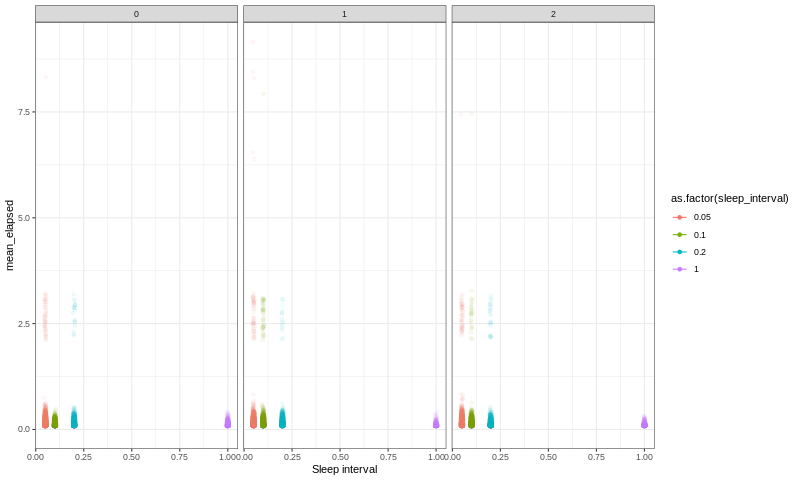

In [5]:
%%R -i out -w 800
library(ggplot2)

out %>% group_by(run, sleep_interval) %>% summarize(mean_elapsed = mean(elapsed)) %>%
ggplot(aes(x=sleep_interval, y=mean_elapsed, color=as.factor(sleep_interval))) + geom_point() + geom_line() +
    geom_jitter(data=out, aes(sleep_interval, elapsed), alpha=.05, width=.005) + 
    xlab("Sleep interval") +
    facet_wrap(~run) + ylim(0, NA) + theme_bw()

### Response time ($R$) against $\lambda$ (theoretical) 

See response time (or elapsed time) versus theoretical $\lambda$ (1/sleep interval).

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


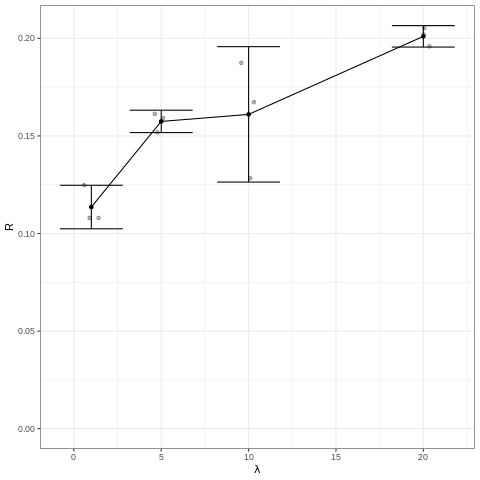

In [6]:
%%R -i out

# average elapsed time and confidence intervals
df_elapsed = out %>% group_by(run, sleep_interval) %>% summarize(elapsed = mean(elapsed)) 
df_elapsed %>% group_by(sleep_interval) %>% summarize(mean = mean(elapsed), sd = sd(elapsed), se = sd/sqrt(n())) %>%
ggplot(aes(1/sleep_interval, mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    geom_jitter(data = df_elapsed, aes(1/sleep_interval, elapsed), alpha=.3, width=.5) + 
    ylab(expression("R")) + ylim(0, NA) + xlab(expression(lambda)) + theme_bw()

For $\lambda$ == 10, we have a huge variability.

Let's see each run in detail.


R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



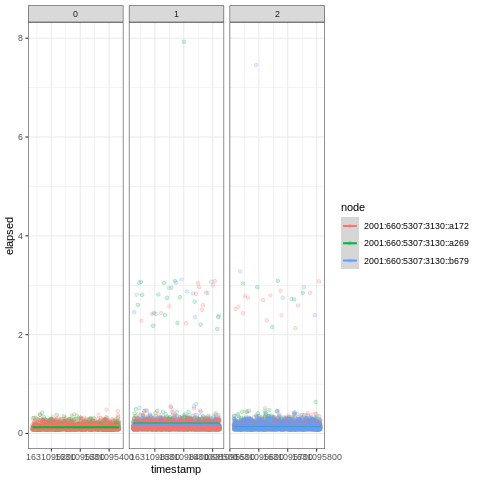

In [7]:
%%R -i out

out %>% filter(sleep_interval==.1) %>% ggplot(aes(timestamp, elapsed, color=node)) + geom_point(alpha=.2) + theme_bw() + facet_wrap(~run, scale="free_x") + geom_smooth()

The run 0 has no messages from node "2001:660:5307:3130::b679".

Something went wrong with this node in this execution.

In [8]:
%%R -i out

out %>% filter(sleep_interval==.1) %>% filter(run == 0) %>% filter(node == "2001:660:5307:3130::b679") %>% count()

  n
1 0


We can double check by looking the logs of this execution.

Open the notebook 04-load-injection-0.100000-0d00bd9c-ca18-4f11-81c1-042abc309f36.ipynb, cell [17].

```
Gets the suffix of sensors' IPv6 addresses.

out = results[0].stdout

node_uids = re.findall(r'fe80::(\w{4})', out, re.MULTILINE|re.DOTALL)

node_uids = list(set(node_uids))

print(node_uids)

['a269', 'a172']
```

There is only 2 nodes in the list of sensors on the border router. Better to verify at this point if all sensors are there before starting the test.

From here, we remove this execution from our logs.

In [9]:
out = out.drop(out[(out.run == 0) & (out.sleep_interval == 0.1)].index)

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


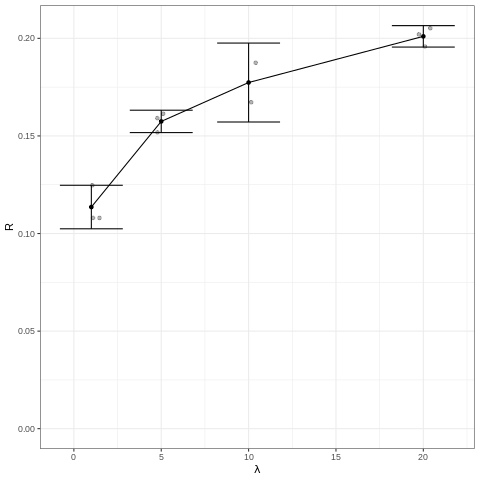

In [10]:
%%R -i out

# average elapsed time and confidence intervals
df_elapsed = out %>% group_by(run, sleep_interval) %>% summarize(elapsed = mean(elapsed)) 
df_elapsed %>% group_by(sleep_interval) %>% summarize(mean = mean(elapsed), sd = sd(elapsed), se = sd/sqrt(n())) %>%
ggplot(aes(1/sleep_interval, mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    geom_jitter(data = df_elapsed, aes(1/sleep_interval, elapsed), alpha=.3, width=.5) + 
    ylab(expression("R")) + ylim(0, NA) + xlab(expression(lambda)) + theme_bw()

### Response time ($R$) against $\lambda$ (theoretical) (per sensor)

See response time (or elapsed time) versus theoretical $\lambda$ (1/sleep interval).

Plot each sensor to see if there's some sensor that is slower than others.

`summarise()` has grouped output by 'run', 'node'. You can override using the `.groups` argument.


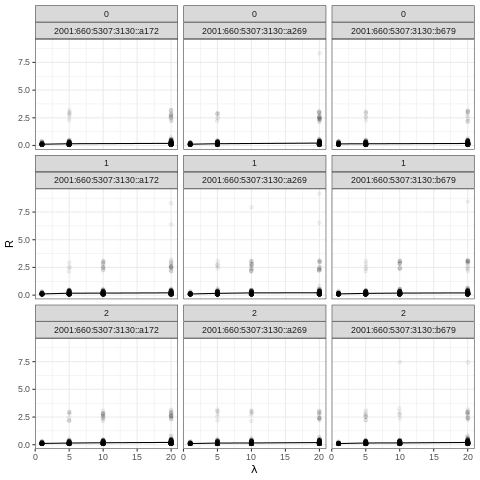

In [11]:
%%R -i out

out %>% group_by(run, node, sleep_interval) %>% summarize(mean_elapsed = mean(elapsed)) %>%
ggplot(aes(1/sleep_interval, mean_elapsed)) + geom_point() + geom_line() +
    geom_jitter(data=out, aes(1/sleep_interval, elapsed), alpha=.05, width=.05) +
    ylab(expression("R")) + xlab(expression(lambda)) +
    facet_wrap(run~node) + theme_bw()

We can't see anything clearly.

Ploting response time evolution over time for a given run.

`summarise()` has grouped output by 'node', 'sleep_interval'. You can override using the `.groups` argument.


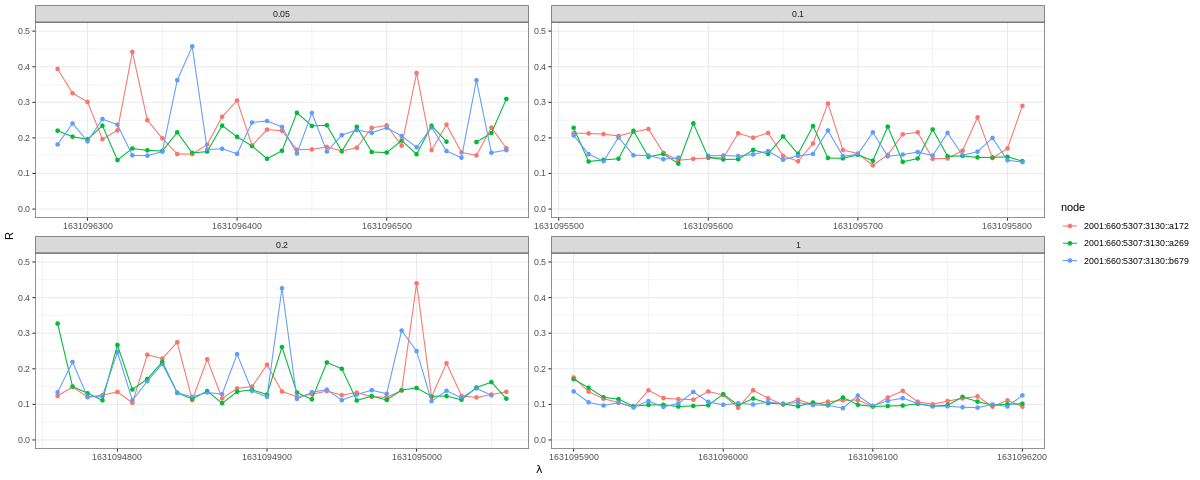

In [12]:
%%R -i out -w 1200

out$timestamp = round(out$timestamp/10)*10 # 10 seconds sliding window
out %>% filter(run == 2) %>% group_by(node, sleep_interval, timestamp) %>% summarize(mean_elapsed = mean(elapsed), sd = sd(elapsed), se = sd/sqrt(n())) %>%
ggplot(aes(timestamp, mean_elapsed, color=node)) + geom_point() + geom_line() +
    #geom_errorbar(aes(ymin=mean_elapsed - 2*se, ymax= mean_elapsed + 2*se)) +
    ylab(expression("R")) + xlab(expression(lambda)) +
    facet_wrap(~sleep_interval, scales="free") + ylim(0, 0.5) + theme_bw()

No, they seems to have similar performance.

### Response time ($R$) against $\lambda$ (observed)

Observed $\lambda$: count number of requests done and divide by experiment duration (300s).

Note that we have different values for $lambda$ and R for each run.

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


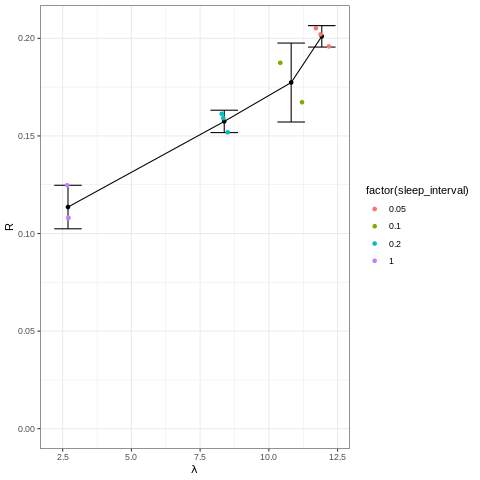

In [13]:
%%R -i out

df_elapsed = out %>% group_by(run, sleep_interval) %>% summarize(lambda=n()/300, elapsed = mean(elapsed)) 
df_elapsed %>% group_by(sleep_interval) %>% summarize(lambda=mean(lambda), mean = mean(elapsed), sd = sd(elapsed), se = sd/sqrt(n())) %>%
ggplot(aes(lambda, mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    geom_point(data=df_elapsed, aes(lambda, elapsed, color=factor(sleep_interval))) + 
    ylab(expression("R")) + ylim(0, NA) + xlab(expression(lambda)) + theme_bw()

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



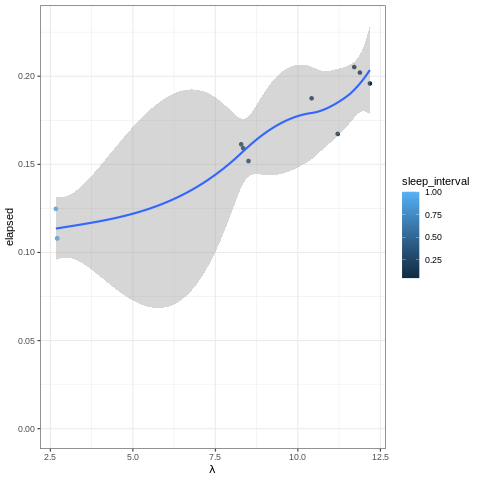

In [14]:
%%R -i out

out %>% group_by(run, sleep_interval) %>% summarize(lambda=n()/300, elapsed = mean(elapsed)) %>%
ggplot(aes(lambda, elapsed, color=sleep_interval)) + geom_point() +
    geom_smooth() +
    xlab(expression(lambda)) + ylim(0, NA) + theme_bw()

### $1/R$ against $\lambda$ (observed)

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


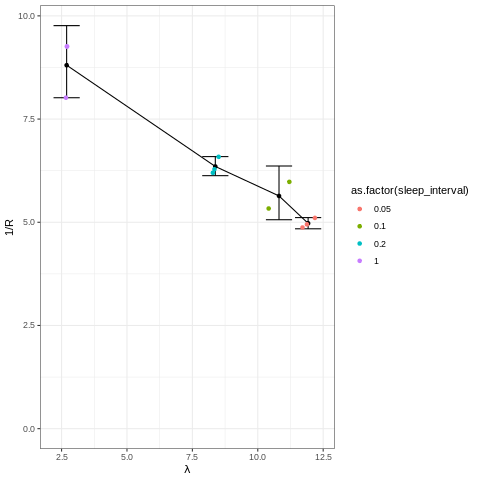

In [15]:
%%R -i out

df_elapsed = out %>% group_by(run, sleep_interval) %>% summarize(lambda=n()/300, elapsed = mean(elapsed)) 
df_elapsed %>% group_by(sleep_interval) %>% summarize(lambda=mean(lambda), mean = mean(elapsed), sd = sd(elapsed), se = sd/sqrt(n())) %>%
ggplot(aes(lambda, 1/mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=1/(mean - 2*se), ymax= 1/(mean + 2*se))) +
    geom_point(data=df_elapsed, aes(lambda, 1/elapsed, color=as.factor(sleep_interval)), alpha=1) +
    ylab(expression("1/R")) + ylim(0, NA) + xlab(expression(lambda)) + theme_bw()

`summarise()` has grouped output by 'run'. You can override using the `.groups` argument.


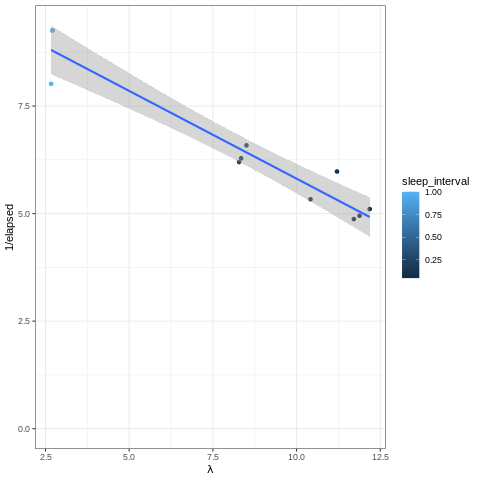

In [18]:
%%R -i out

out %>% group_by(run, sleep_interval) %>% summarize(lambda=n()/300, elapsed = mean(elapsed)) %>%
ggplot(aes(lambda, 1/elapsed, color=sleep_interval)) + geom_point() +
    geom_smooth(method="lm", formula="y~x") +
    xlab(expression(lambda)) + ylim(0, NA) + theme_bw()